# Gradient Descent
This notebook demonstrates the gradient descent approach to determine the best fitting parameters by linear regression. 



In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import sklearn.decomposition
import math
from sklearn import preprocessing

import matplotlib
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import defaultdict

from tqdm.notebook import tqdm
from ipywidgets import interact
%matplotlib inline

## Examples Prof. Dr. Josef Bürgler

### Contour Lines and gradient descent

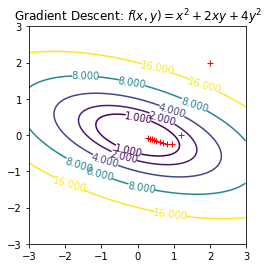

In [3]:
# Draw contour lines
# f(x,y) = x^2 + 2xy + 4y^2

delta = 0.025

x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

Z = X**2+2*X*Y+4*Y**2

plt.figure()
CS=plt.contour(X,Y,Z,levels=[1,2,4,8,16])
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contour plot of $x^2+2xy+4y^2$')
plt.axis('scaled')
plt.axis([-3.0, 3.0, -3.0, 3.0])


# Draw step by step gradient descent
def grad_f(x,y):
    return 2*x+2*y,2*x+8*y

xk = 2 # x-coord. of startvector
yk = 2 # y-coord. of startvector
alpha = 0.1 # learning rate
path_x = [xk]
path_y = [yk]

for i in range(10):
    f_x, f_y = grad_f(xk,yk)
    xk = xk - alpha * f_x
    yk = yk - alpha * f_y
    path_x += [xk]
    path_y += [yk]

plt.clabel(CS,inline=1,fontsize=10)
plt.plot(path_x,path_y,'r+',linewidth=3)
plt.title('Gradient Descent: $f(x,y)=x^2+2xy+4y^2$')
plt.show()


### Batch Gradient Descent

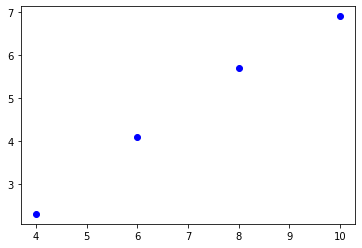

In [6]:
x_data = np.array([4.0,6.0,8.0,10.0])
y_data = np.array([2.3,4.1,5.7, 6.9])

theta_0 = 0.75
theta_1 = 0.5

y = lambda x: theta_0 + theta_1*x

def summation(y,x_data,y_data):
    tot1 = 0
    tot2 = 0
    
    for i in range(1,len(x_data)):
        tot1 += (y(x_data[i])-y_data[i])*1
        tot2 += (y(x_data[i])-y_data[i])*x_data[i]
        
    return tot1/len(x_data),tot2/len(x_data)

theta_0_data = [theta_0]
theta_1_data = [theta_1]
alpha = 0.05

for i in range(1000):
    s1, s2 = summation(y,x_data,y_data)
    theta_0 = theta_0 - alpha * s1
    theta_1 = theta_1 - alpha * s2
    theta_0_data += [theta_0]
    theta_1_data += [theta_1]
    
    
plt.plot(x_data,y_data,'bo')

def plot_line(y, data_points):
    x_vals = [i for i in range(int(min(data_points)-1),
                               int(max(data_points))+2)]
    y_vals = [y(x) for x in x_vals]
    plt.plot(x_vals,y_vals,'r')

#plot_line(y,x_data)



## Part 1 - Toy Example
Firstly, we demonstrate gradient descent on a simple linear regression problem with one dependent and one independent variable.

In [7]:
X = np.array([1,1,2,3,4,5,6,7,8,9,10,10])
y = np.array([1,2,3,1,4,5,6,4,7,10,15,9])

x and y values are plotted in a diagram.

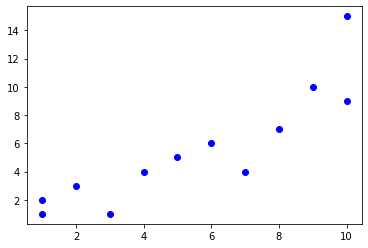

In [8]:
plt.plot(X, y, 'bo')
plt.show()

We then try to fit the points by a straight line.

In [9]:
theta0 = -0.5
theta1 = 1

In [10]:
def predict(X, theta0, theta1):
    y_pred = theta0 + theta1 * X
    return y_pred

y_pred = predict(X, theta0, theta1)

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


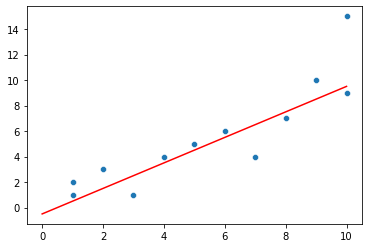

In [11]:
def plot_regression_line(X, theta0, theta1, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    x = np.arange(X.min()-1, X.max()+1, 1).reshape(-1,1)
    y_pred = predict(x, theta0, theta1)
    ax.plot(x, y_pred, color="r")
    
ax = sns.scatterplot(X, y)
plot_regression_line(X, theta0, theta1, ax)
plt.show()

This does not look so bad. Let's implement a gradient descent algorithm to do this automatically.

### Cost function
We define a cost function that determines the mean squared error of the predicted and the actual y coordinates. To get rid of the factor 2 in the gradient
formula, we divide the sum by 2.

> Implement the MSE cost function

In [12]:
def cost(y, y_pred):
    # START YOUR CODE
    cost = np.sum((y_pred - y)**2) / (2 * len(y))
    # END YOUR CODE
    return cost

In [41]:
def cost(y, y_pred):
    cost = np.sum((y_pred - y) ** 2) / (2 * len(y))
    return cost

In [13]:
cost(y, y_pred)

1.9583333333333333

### Calculate gradient

Next, let us determine the gradient of y in respect to the parameters.

> Implement the `gradient` function

In [14]:
def gradient(X, y, theta0, theta1):
    # START YOUR CODE
    y_pred = predict(X, theta0, theta1)
    diff = y_pred - y
    
    grad_theta0 = np.sum(diff) / len(X)
    grad_theta1 = np.dot(diff, X.T) / len(X)
    
    # END YOUR CODE
    return grad_theta0, grad_theta1

In [ ]:
def gradient(X, y, theta0, theta1):
    y_pred = predict(X, theta0, theta1)
    diff = y_pred - y
    
    n = len(X)
    grad_theta0 = np.sum(diff) / n
    grad_theta1 = np.dot(diff, X.T) / n
    
    return grad_theta0, grad_theta1

In [15]:
gradient(X, y, theta0, theta1)

(-0.5833333333333334, -4.166666666666667)

### Batch Gradient descent


> Now complete the `fit` function by iteratively updating our model parameters.

To visualize how the parameters and cost functions change with each epoch, we store them in a dictionary.

In [16]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs + 1)):
        # START YOUR CODE
        
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1 
        
        # END YOUR CODE
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)

        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return theta0, theta1, hist

In [ ]:
def fit(X, y, alpha, num_epochs, display_every=10):
    theta0 = 0.0
    theta1 = np.random.randn()
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs + 1)):
        grad_theta0, grad_theta1 = gradient(X, y, theta0, theta1)
        theta0 = theta0 - alpha * grad_theta0
        theta1 = theta1 - alpha * grad_theta1
        
        y_pred = predict(X, theta0, theta1)
        curr_cost = cost(y, y_pred)
        
        hist["cost"].append(curr_cost)
        hist["theta0"].append(theta0)
        hist["theta1"].append(theta1)

        if epoch % display_every == 0:
            print("Epoch {} -  cost: {}".format(epoch, curr_cost))
        
    return theta0, theta1, hist

In [17]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=2)

Epoch 2 -  cost: 13.42209927089536
Epoch 4 -  cost: 3.1919678249201464
Epoch 6 -  cost: 1.972781341732863
Epoch 8 -  cost: 1.8269885152270018
Epoch 10 -  cost: 1.8090644215342169
Epoch 12 -  cost: 1.8063776290622604
Epoch 14 -  cost: 1.8055113737434236
Epoch 16 -  cost: 1.804867390201186
Epoch 18 -  cost: 1.8042552387520028
Epoch 20 -  cost: 1.8036521811054536



### Visualize learning 
We can now visualize the learning process by plotting the validation curve. The validation curve shows how the cost decreases by increasing number of epochs.

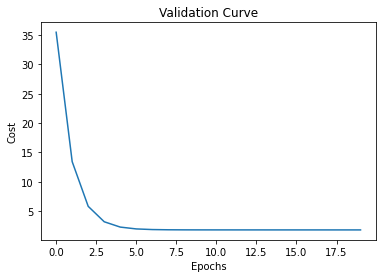

In [18]:
def plot_validation_curve(data, ax=None, ylim=None):
    if ax is None:
        fig, ax = plt.subplots()
        ax.set_title("Validation Curve")
        ax.set_ylabel("Cost")
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlabel("Epochs")
    ax.plot(data)
    
plot_validation_curve(hist["cost"])

Using our history, we can now visualize how the parameters change by each epoch.

In [19]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X, y)
    plot_regression_line(X, hist["theta0"][epoch-1], hist["theta1"][epoch-1], ax)
    plt.show()


interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Contour plot
We can visualize how our model parameters $\Theta$ change after each epoch by displaying a contour plot.

In [20]:
def parallel_cost(Theta0, Theta1, X, y):
    m = Theta0.shape[0]
    n = Theta0.shape[1]
    tot = np.zeros((m,n))
    for i in range(1,len(X)):
        tot += (Theta0 + Theta1 * X[i] - y[i]) ** 2;
    return tot/(2*len(X))

In [21]:
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

def contour_plot(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(-0.5, 0.5, delta)
    t1 = np.arange(0.5, 1.5, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [0.25,0.5,1,2,3])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [22]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot(X, y)
    for i in range(epoch):
        theta0 = hist["theta0"][i]
        theta1 = hist["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist["theta0"][i-1]
        theta1_prev = hist["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=20, min=1), Output()), _dom_classes=('widget…

### Normalise data
Let's run the experiment above again but this time first normalise the data and see what happens.
We use the `StandardScaler` which implements z-normalisation.

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1)
X

array([-1.40556386, -1.40556386, -1.09321633, -0.78086881, -0.46852129,
       -0.15617376,  0.15617376,  0.46852129,  0.78086881,  1.09321633,
        1.40556386,  1.40556386])

#### Apply gradient descent algorithm on normalised data.

Epoch 2 -  cost: 28.768828379391447
Epoch 4 -  cost: 27.703918445533834
Epoch 6 -  cost: 26.680970212060856
Epoch 8 -  cost: 25.698330220550165
Epoch 10 -  cost: 24.754410165438557
Epoch 12 -  cost: 23.847684326739365
Epoch 14 -  cost: 22.976687103921023
Epoch 16 -  cost: 22.140010646960643
Epoch 18 -  cost: 21.336302580743563
Epoch 20 -  cost: 20.56426381913062



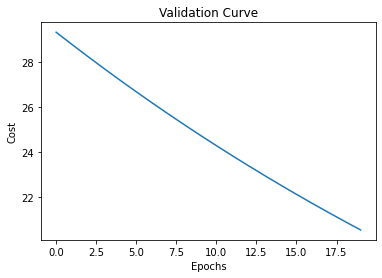

In [24]:
alpha = 0.01
num_epochs = 20

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=2)
plot_validation_curve(hist["cost"])

It seems like it did not converge yet. Let's increase the learning rate $\alpha$ and the number of epochs and run it again.

Epoch 5 -  cost: 9.243083131102855
Epoch 10 -  cost: 4.358374108689163
Epoch 15 -  cost: 2.655181386411559
Epoch 20 -  cost: 2.0613148048181325
Epoch 25 -  cost: 1.8542463315206186
Epoch 30 -  cost: 1.7820460192573517
Epoch 35 -  cost: 1.7568713270026632
Epoch 40 -  cost: 1.7480934545773017
Epoch 45 -  cost: 1.7450327997126294
Epoch 50 -  cost: 1.743965615348731



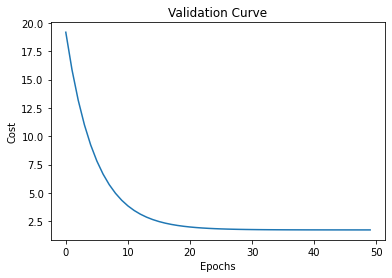

In [25]:
alpha = 0.1
num_epochs = 50

theta0, theta1, hist = fit(X, y, alpha, num_epochs, display_every=5)
plot_validation_curve(hist["cost"])

That looks much better now. Okay, let's plot the contours.

In [26]:
def contour_plot(X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12,8))
    delta = 0.025
    t0 = np.arange(0, 9, delta)
    t1 = np.arange(0, 9, delta)
    T0, T1 = np.meshgrid(t0, t1)
    Z = parallel_cost(T0, T1, X, y)
    CS = ax.contour(T0, T1, Z, levels = [1,2,3,4,5,6])
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('Contour plot')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    return ax

In [27]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_contour_plot(epoch=1):
    ax = contour_plot(X, y)
    for i in range(epoch):
        theta0 = hist["theta0"][i]
        theta1 = hist["theta1"][i]
        ax.plot(theta0, theta1, "ro", linewidth=9)
        if i == 0: 
            continue
            
        theta0_prev = hist["theta0"][i-1]
        theta1_prev = hist["theta1"][i-1]
        
        ax.annotate('', xy=[theta0, theta1], xytext=[theta0_prev, theta1_prev],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    plt.show()

interactive(children=(IntSlider(value=1, description='epoch', max=50, min=1), Output()), _dom_classes=('widget…

The contours are not as narrow as before. 

<span style="color:red">
    Make sure that you never forget to scale your data before applying the gradient descent algorithm!</span>

## Part 2 - House prices data set
Now that we have tested our functions with our toy datset, let's move to a the house price dataset.

In [28]:
df = pd.read_csv('house_prices.csv')
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We want to predict the price of a house based on its size.

Let's split the feature from the target variable.

In [29]:
X = df[["Size"]].values
y = df.Price.values

Next, we further split the data into a training and test set.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1)
X_test = X_test.reshape(-1)

Here we visualize our training data in a scatter plot.

c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

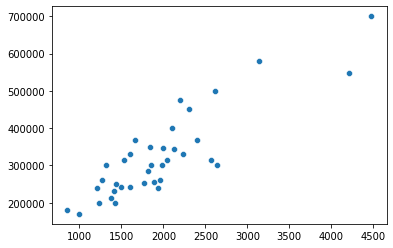

In [31]:
sns.scatterplot(X_train.reshape(-1), y_train)

#### Apply Batch Gradient Descent
Let's use our implemented `fit` method to apply batch gradient descent to the house price dataset and see what happens.

Epoch 20 -  cost: 3.175876659393078e+196
Epoch 40 -  cost: inf
Epoch 60 -  cost: inf
Epoch 80 -  cost: nan
Epoch 100 -  cost: nan
Epoch 120 -  cost: nan
Epoch 140 -  cost: nan
Epoch 160 -  cost: nan
Epoch 180 -  cost: nan
Epoch 200 -  cost: nan
Epoch 220 -  cost: nan
Epoch 240 -  cost: nan
Epoch 260 -  cost: nan
Epoch 280 -  cost: nan
Epoch 300 -  cost: nan



c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
c:\users\adiwi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


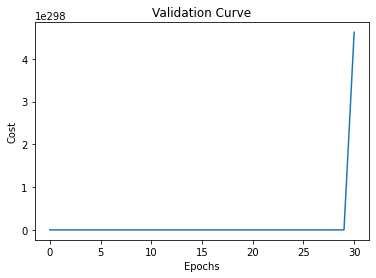

In [32]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist = fit(X_train, y_train, alpha, num_epochs, display_every=20)
plot_validation_curve(hist["cost"])

It seems like our gradient descent algorithm does not converge! 

> Why did that happen?

### Scaling the data
Let's try it again but this time we will scale the data accordingly.

In [33]:
X = df[["Size"]].values
y = df.Price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> z-normalise the training and test data by using the [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [34]:
# z-normalise the training and test data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).reshape(-1)
X_test = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).reshape(-1)
X_test = scaler.transform(X_test)

Now we apply the gradient descent algorithm again.

Epoch 20 -  cost: 39882056715.730965
Epoch 40 -  cost: 27198746199.31323
Epoch 60 -  cost: 18713969658.659935
Epoch 80 -  cost: 13037893775.188335
Epoch 100 -  cost: 9240759309.647385
Epoch 120 -  cost: 6700583588.708913
Epoch 140 -  cost: 5001277769.5967
Epoch 160 -  cost: 3864490167.4375134
Epoch 180 -  cost: 3104011366.1008735
Epoch 200 -  cost: 2595272525.0157332
Epoch 220 -  cost: 2254940607.8423057
Epoch 240 -  cost: 2027268166.7134082
Epoch 260 -  cost: 1874961733.3935568
Epoch 280 -  cost: 1773073030.8541007
Epoch 300 -  cost: 1704912366.337899



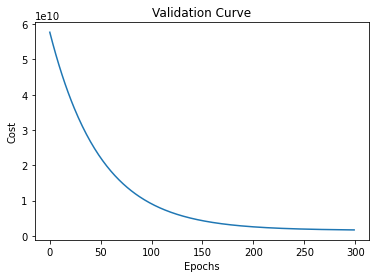

In [35]:
alpha = 0.01
num_epochs = 300

theta0, theta1, hist = fit(X_train, y_train, alpha, num_epochs, display_every=20)
plot_validation_curve(hist["cost"])

Our validation curve looks much better now. We see that the cost converges after a few epochs.

Again we can visualize how our regression line looks after each epoch.

In [36]:
@interact(epoch=(1, len(hist["theta0"])))
def visualize_learning(epoch=1):
    ax = sns.scatterplot(X_train, y_train)
    plot_regression_line(X_train, hist["theta0"][epoch-1], hist["theta1"][epoch-1], ax)
    plt.show()


interactive(children=(IntSlider(value=1, description='epoch', max=300, min=1), Output()), _dom_classes=('widge…

### Calculate metrics on the test set
> Now calculate the $R^2$ score on the test set by using the previously implemented `predict` function.

In [37]:
y_pred = predict(X_test, theta0, theta1)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.406509040546137


In [ ]:
y_pred = predict(X_test, theta0, theta1)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

## Part 3 -  Autoscout data set
We extend our code for multiple linear regression. We will use the autoscout dataset from the previous exercises. First we apply the data cleaning and then z-Normalise our data.

In [38]:
df = pd.read_csv('cars.csv')
df.drop(['Name', 'Registration'], axis='columns', inplace=True)
df.drop([17010, 7734, 47002, 44369, 24720, 50574, 36542, 42611,
         22513, 12773, 21501, 2424, 52910, 29735, 43004, 47125], axis='rows', inplace=True)
df.drop(df.index[df.EngineSize > 7500], axis='rows', inplace=True)
df.drop_duplicates(inplace=True)
df.head()

numerical_cols = ['Price', 'Mileage', 'Horsepower', 'EngineSize']

df = pd.get_dummies(df)

train, test = train_test_split(df, test_size=0.4, random_state=42)

q3 = train.loc[:, numerical_cols].describe().loc['75%']
iqr = q3 - df.loc[:, numerical_cols].describe().loc['25%']
upper_boundary = q3 + 1.5*iqr
upper_boundary

# And here the outliers are removed
train = train[(train.Price <= upper_boundary.Price) &
        (train.Mileage <= upper_boundary.Mileage) &
        (train.Horsepower <= upper_boundary.Horsepower) &
        (train.EngineSize <= upper_boundary.EngineSize)]

test = test[(test.Price <= upper_boundary.Price) &
        (test.Mileage <= upper_boundary.Mileage) &
        (test.Horsepower <= upper_boundary.Horsepower) &
        (test.EngineSize <= upper_boundary.EngineSize)]

X_train = train.drop(columns=["Price"]).values
X_test = test.drop(columns=["Price"]).values

y_train = train.Price.values
y_test = test.Price.values

# z-Normalise the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We modify our predict function that instead of providing $\theta_0$ and $\theta_1$ we now provide the bias ($\theta_0$) and the other parameters $\Theta$ as an array. 
> Implement the `predict` function

In [39]:
def predict(X, bias, thetas):
    # START YOUR CODE
    y_pred = bias + np.dot(X, thetas)
    # END YOUR CODE
    return y_pred

In [ ]:
def predict(X, bias, thetas):
    y_pred = bias + np.dot(X, thetas)
    return y_pred

> Implement the `gradient` function

In [40]:
def gradient(X, y, bias, thetas):
    # START YOUR CODE
    y_pred = predict(X, bias, thetas)
    diff = y_pred - y
    
    n = len(X)
    grad_bias = np.sum(diff) / n
    grad_thetas = np.dot(diff, X) / n
    
    
    
    # END YOUR CODE
    return grad_bias, grad_thetas

In [ ]:
def gradient(X, y, bias, thetas):
    y_pred = predict(X, bias, thetas)
    diff = y_pred - y
    
    n = len(X)
    grad_bias = np.sum(diff) / n
    grad_thetas = np.dot(diff, X) / n
    
    return grad_bias, grad_thetas

We extend our `fit` function by tracking not only the cost but also the $R^2$ score.

In [41]:
def fit(X_train, y_train, alpha, num_epochs, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    
    hist = defaultdict(list)
    for epoch in tqdm(range(1, num_epochs+1)):
        grad_bias, grad_thetas = gradient(X_train, y_train, bias, thetas)
        bias = bias - alpha * grad_bias
        thetas = thetas - alpha * grad_thetas
        
        y_pred_train = predict(X_train, bias, thetas)
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        
        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0:
            print("Epoch {0} - cost: {1:.2} - r2: {2:.4}"
                  .format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

In [42]:
alpha = 0.01
num_epochs = 1000
bias, thetas, hist = fit(X_train, y_train, alpha, num_epochs)

Epoch 50 - cost: 1.4e+08 - r2: -0.198
Epoch 100 - cost: 7e+07 - r2: 0.4164
Epoch 150 - cost: 4.5e+07 - r2: 0.6264
Epoch 200 - cost: 3.6e+07 - r2: 0.7027
Epoch 250 - cost: 3.2e+07 - r2: 0.7313
Epoch 300 - cost: 3.1e+07 - r2: 0.7423
Epoch 350 - cost: 3e+07 - r2: 0.7468
Epoch 400 - cost: 3e+07 - r2: 0.7487
Epoch 450 - cost: 3e+07 - r2: 0.7496
Epoch 500 - cost: 3e+07 - r2: 0.7501
Epoch 550 - cost: 3e+07 - r2: 0.7504
Epoch 600 - cost: 3e+07 - r2: 0.7506
Epoch 650 - cost: 3e+07 - r2: 0.7508
Epoch 700 - cost: 3e+07 - r2: 0.7509
Epoch 750 - cost: 3e+07 - r2: 0.751
Epoch 800 - cost: 3e+07 - r2: 0.7511
Epoch 850 - cost: 3e+07 - r2: 0.7511
Epoch 900 - cost: 3e+07 - r2: 0.7512
Epoch 950 - cost: 3e+07 - r2: 0.7512
Epoch 1000 - cost: 3e+07 - r2: 0.7512



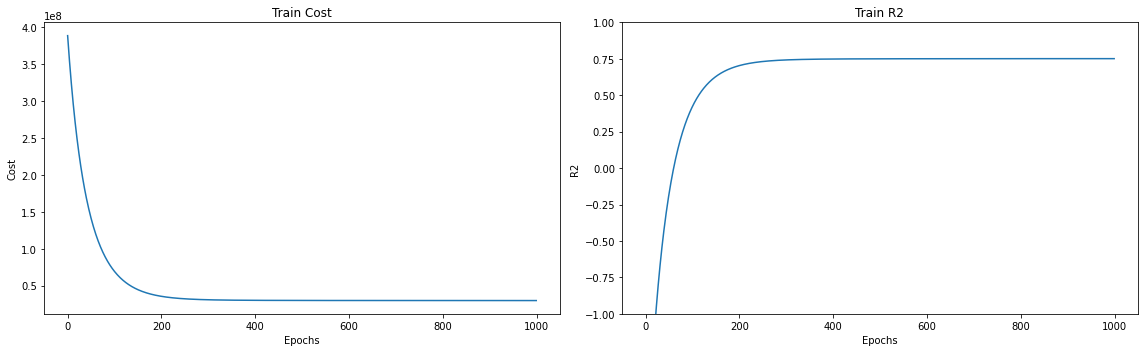

In [43]:
def plot_validation_curves(hist, ylim=None):
    fig, ax = plt.subplots(ncols=2, figsize=(16,5))

    ax[0].set_title("Train Cost")
    ax[0].set_ylabel("Cost")
    plot_validation_curve(hist["train_cost"], ax[0], ylim)

    ax[1].set_title("Train R2")
    ax[1].set_ylabel("R2")
    ax[1].set_ylim(-1, 1)
    plot_validation_curve(hist["train_r2"], ax[1])

    plt.tight_layout()

plot_validation_curves(hist)

### Calculate metrics on test set
Now we calculate the $R^2$ score on the test set.

In [44]:
y_pred = predict(X_test, bias, thetas)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.7477929998673145


Compared to the previous exercise where we calculated the estimates for the $\Theta$ numerically using the normal equation we got almost the same result with the gradient descent algorithm.

### Minibatch Gradient Descent

> Now  modify our `fit` function to use mini batch gradient descent. So instead of calculating the gradient on the whole dataset on each step, only use a subset of the data.

In [45]:
def fit(X_train, y_train, alpha, num_epochs, batch_size, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    hist = defaultdict(list)
    
    indices_train = np.arange(len(X_train))   
    
    num_samples = len(X_train)
    steps = int(num_samples/batch_size)
    
    for epoch in tqdm(range(1, num_epochs + 1)):
        # randomize inputs
        np.random.shuffle(indices_train)
        
        X_train_epoch = X_train[indices_train]
        y_train_epoch = y_train[indices_train]
        
        for step in range(steps):
            start = step * batch_size
            end = step * batch_size + batch_size
            
            X_train_mini = X_train_epoch[start:end]
            y_train_mini = y_train_epoch[start:end]
        
            grad_bias, grad_thetas = gradient(X_train_mini, y_train_mini, bias, thetas)
            bias = bias - alpha * grad_bias
            thetas = thetas - alpha * grad_thetas

        y_pred_train = predict(X_train, bias, thetas)
        
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)

        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0 or epoch == num_epochs:
            print("Epoch {0} - train_cost: {1:.2} - train_r2: {2:.4}".format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

In [ ]:
def fit(X_train, y_train, alpha, num_epochs, batch_size, display_every=50):
    bias = 0.0
    thetas = np.random.randn(*(1, X_train.shape[1])).reshape(-1)
    hist = defaultdict(list)
    
    indices_train = np.arange(len(X_train))   
    
    num_samples = len(X_train)
    steps = int(num_samples/batch_size)
    
    for epoch in tqdm(range(1, num_epochs + 1)):
        # randomize inputs
        np.random.shuffle(indices_train)
        
        X_train_epoch = X_train[indices_train]
        y_train_epoch = y_train[indices_train]
        
        for step in range(steps):
            start = step * batch_size
            end = step * batch_size + batch_size
            
            X_train_mini = X_train_epoch[start:end]
            y_train_mini = y_train_epoch[start:end]
        
            grad_bias, grad_thetas = gradient(X_train_mini, y_train_mini, bias, thetas)
            bias = bias - alpha * grad_bias
            thetas = thetas - alpha * grad_thetas

        y_pred_train = predict(X_train, bias, thetas)
        
        train_cost = cost(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)

        hist["train_cost"].append(train_cost)
        hist["train_r2"].append(train_r2)
        
        if epoch % display_every == 0 or epoch == num_epochs:
            print("Epoch {0} - train_cost: {1:.2} - train_r2: {2:.4}".format(epoch, train_cost, train_r2))
        
    return bias, thetas, hist

Wo have now introduced an additional hyperparameter `batch_size`. 
* If we set `batch_size` equal to 1, we use Stochastic Gradient Desccent: We update our model parameters $\Theta$ for each training example. 
* If we set `batch_size` equal to to the number of training samples we have again Batch Gradient Descent: We use all training samples to update the model parameters $\Theta$.

#### Batch Gradient Descent
We run batch gradient descent and see what happens

Epoch 50 - train_cost: 1.4e+08 - train_r2: -0.198
Epoch 100 - train_cost: 7e+07 - train_r2: 0.4164
Epoch 150 - train_cost: 4.5e+07 - train_r2: 0.6264
Epoch 200 - train_cost: 3.6e+07 - train_r2: 0.7027
Epoch 250 - train_cost: 3.2e+07 - train_r2: 0.7313
Epoch 300 - train_cost: 3.1e+07 - train_r2: 0.7423
Epoch 350 - train_cost: 3e+07 - train_r2: 0.7468
Epoch 400 - train_cost: 3e+07 - train_r2: 0.7487
Epoch 450 - train_cost: 3e+07 - train_r2: 0.7496
Epoch 500 - train_cost: 3e+07 - train_r2: 0.7501
Epoch 550 - train_cost: 3e+07 - train_r2: 0.7504
Epoch 600 - train_cost: 3e+07 - train_r2: 0.7506
Epoch 650 - train_cost: 3e+07 - train_r2: 0.7508
Epoch 700 - train_cost: 3e+07 - train_r2: 0.7509
Epoch 750 - train_cost: 3e+07 - train_r2: 0.751
Epoch 800 - train_cost: 3e+07 - train_r2: 0.7511
Epoch 850 - train_cost: 3e+07 - train_r2: 0.7511
Epoch 900 - train_cost: 3e+07 - train_r2: 0.7512
Epoch 950 - train_cost: 3e+07 - train_r2: 0.7512
Epoch 1000 - train_cost: 3e+07 - train_r2: 0.7512



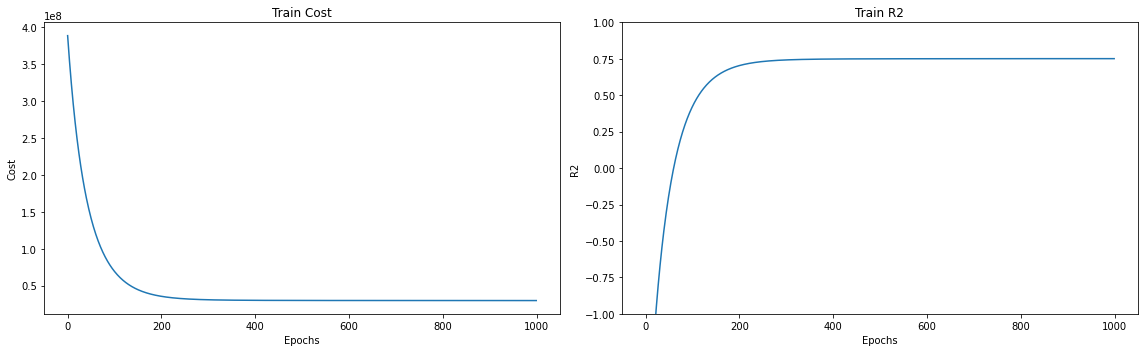

In [50]:
alpha = 1e-2
num_epochs = 1000
batch_size = len(X_train)

bias, thetas, hist = fit(X_train, y_train, alpha, num_epochs, batch_size)
plot_validation_curves(hist)

We can notice the following:
* The training did not converge after those 50 epochs. We would need more epochs.
* The training cost is strictly decreasing as we take all training samples per step

#### Minibatch Gradient Descnet
Let's compare it to minibatch gradient descent with a `batch_size` of 100.

Epoch 50 - train_cost: 3e+07 - train_r2: 0.7513



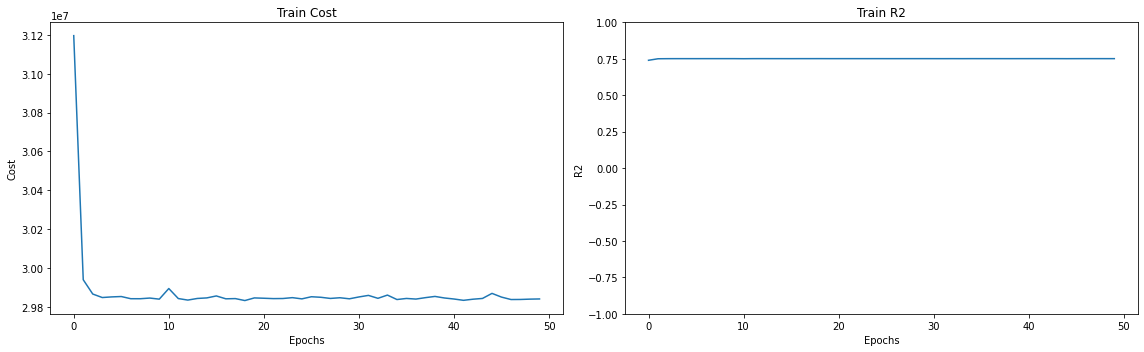

In [47]:
alpha = 1e-2
num_epochs = 50
batch_size = 100

bias, thetas, hist = fit(X_train, y_train, alpha, num_epochs, batch_size)
plot_validation_curves(hist)

* As we are taking only a subset of our data when applying gradient descent, the training cost are not stricly decreasing anymore. 
* We do not need as many epochs as before as we are doing much more updates now.

### Calculate the performance on the test set

In [51]:
y_pred = predict(X_test, bias, thetas)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.7477931397163529


### Answer the ILIAS Quiz

> Now that you have implemented the gradient descent algorithm from scratch, you're ready to answer the ILIAS Quiz **Gradient Descent**.

## Frage 1
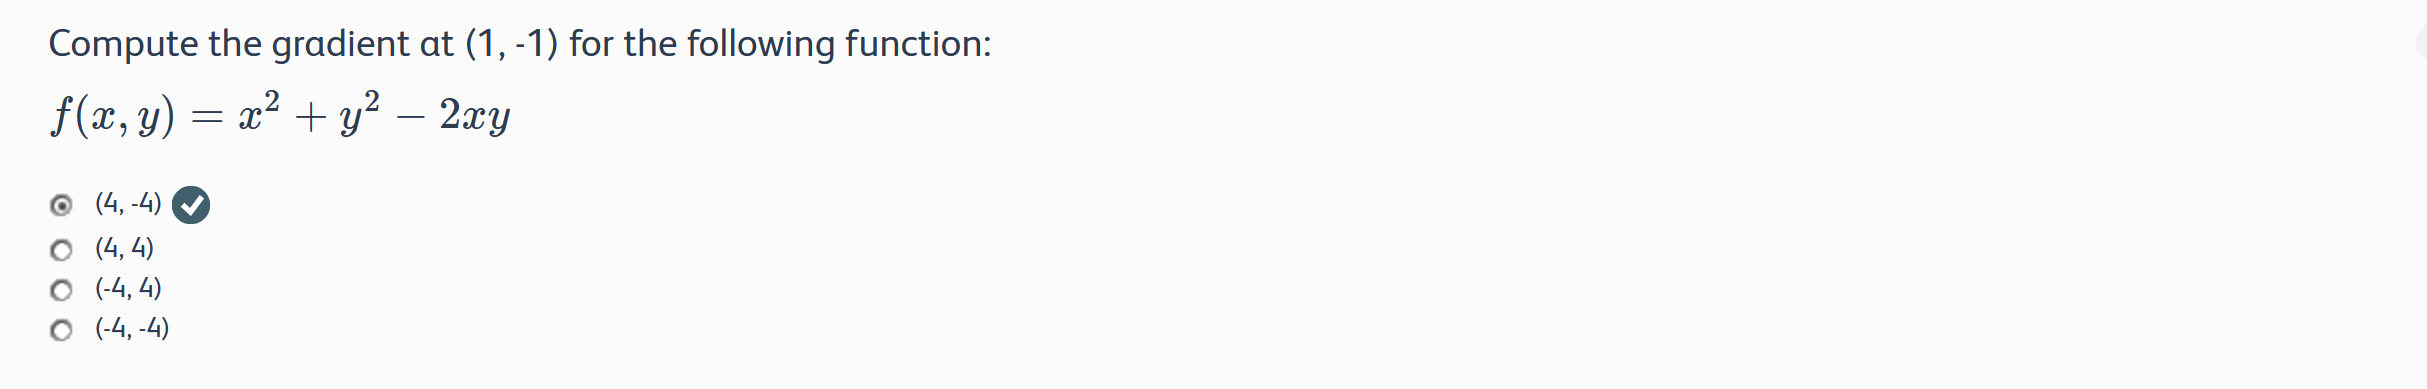

## Frage 2
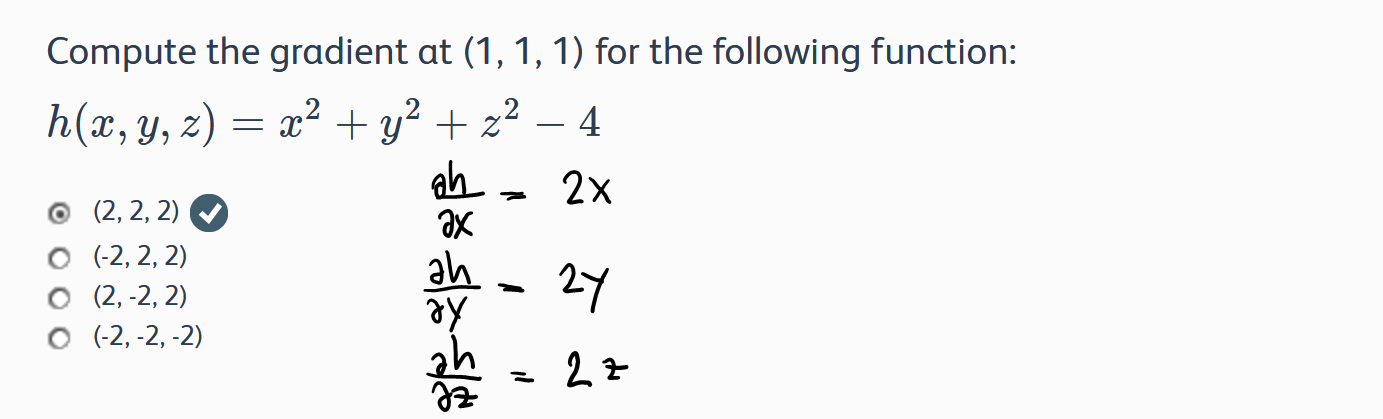

## Frage 3
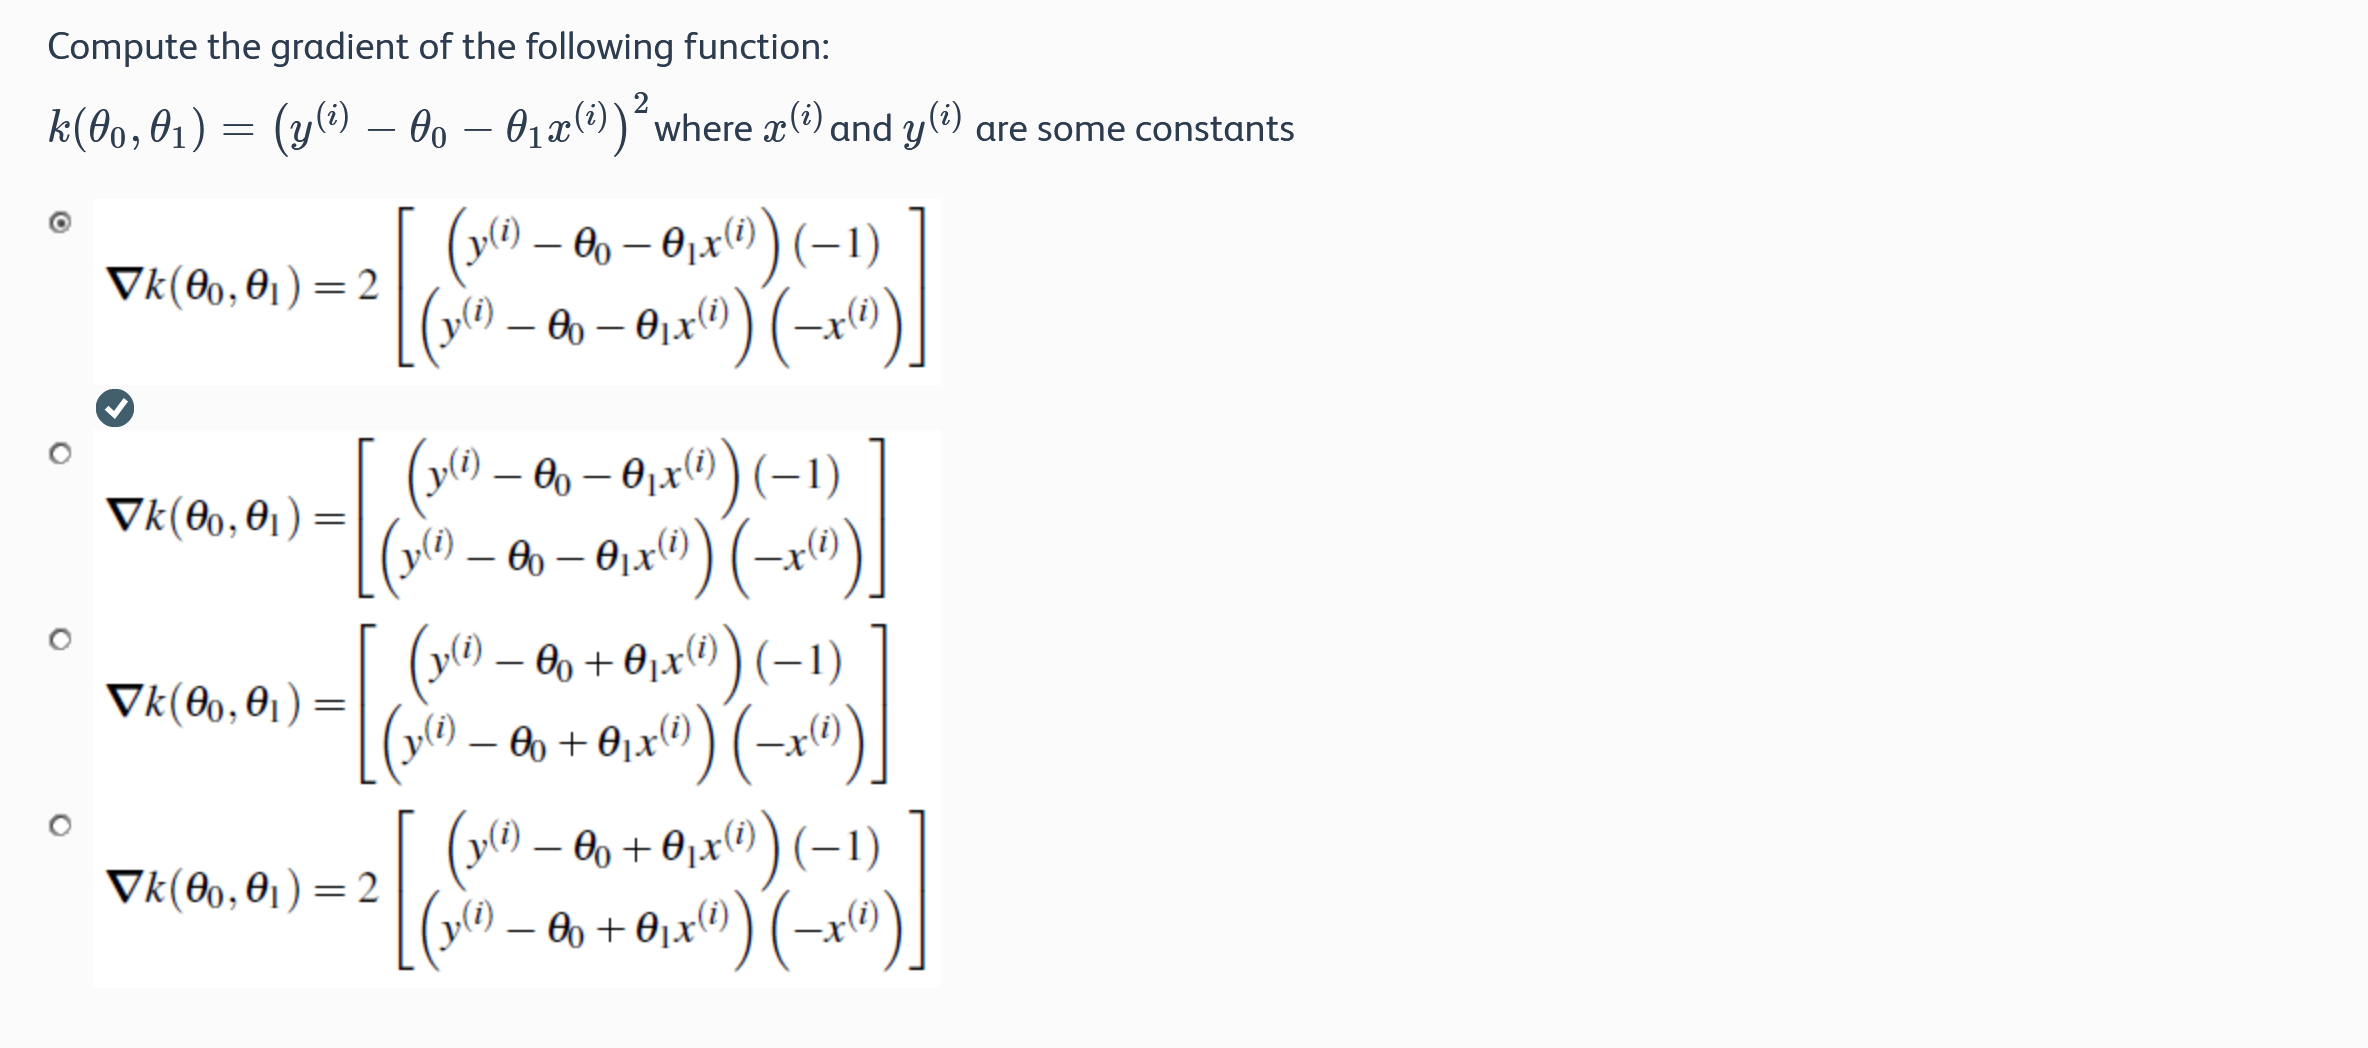

## Frage 4
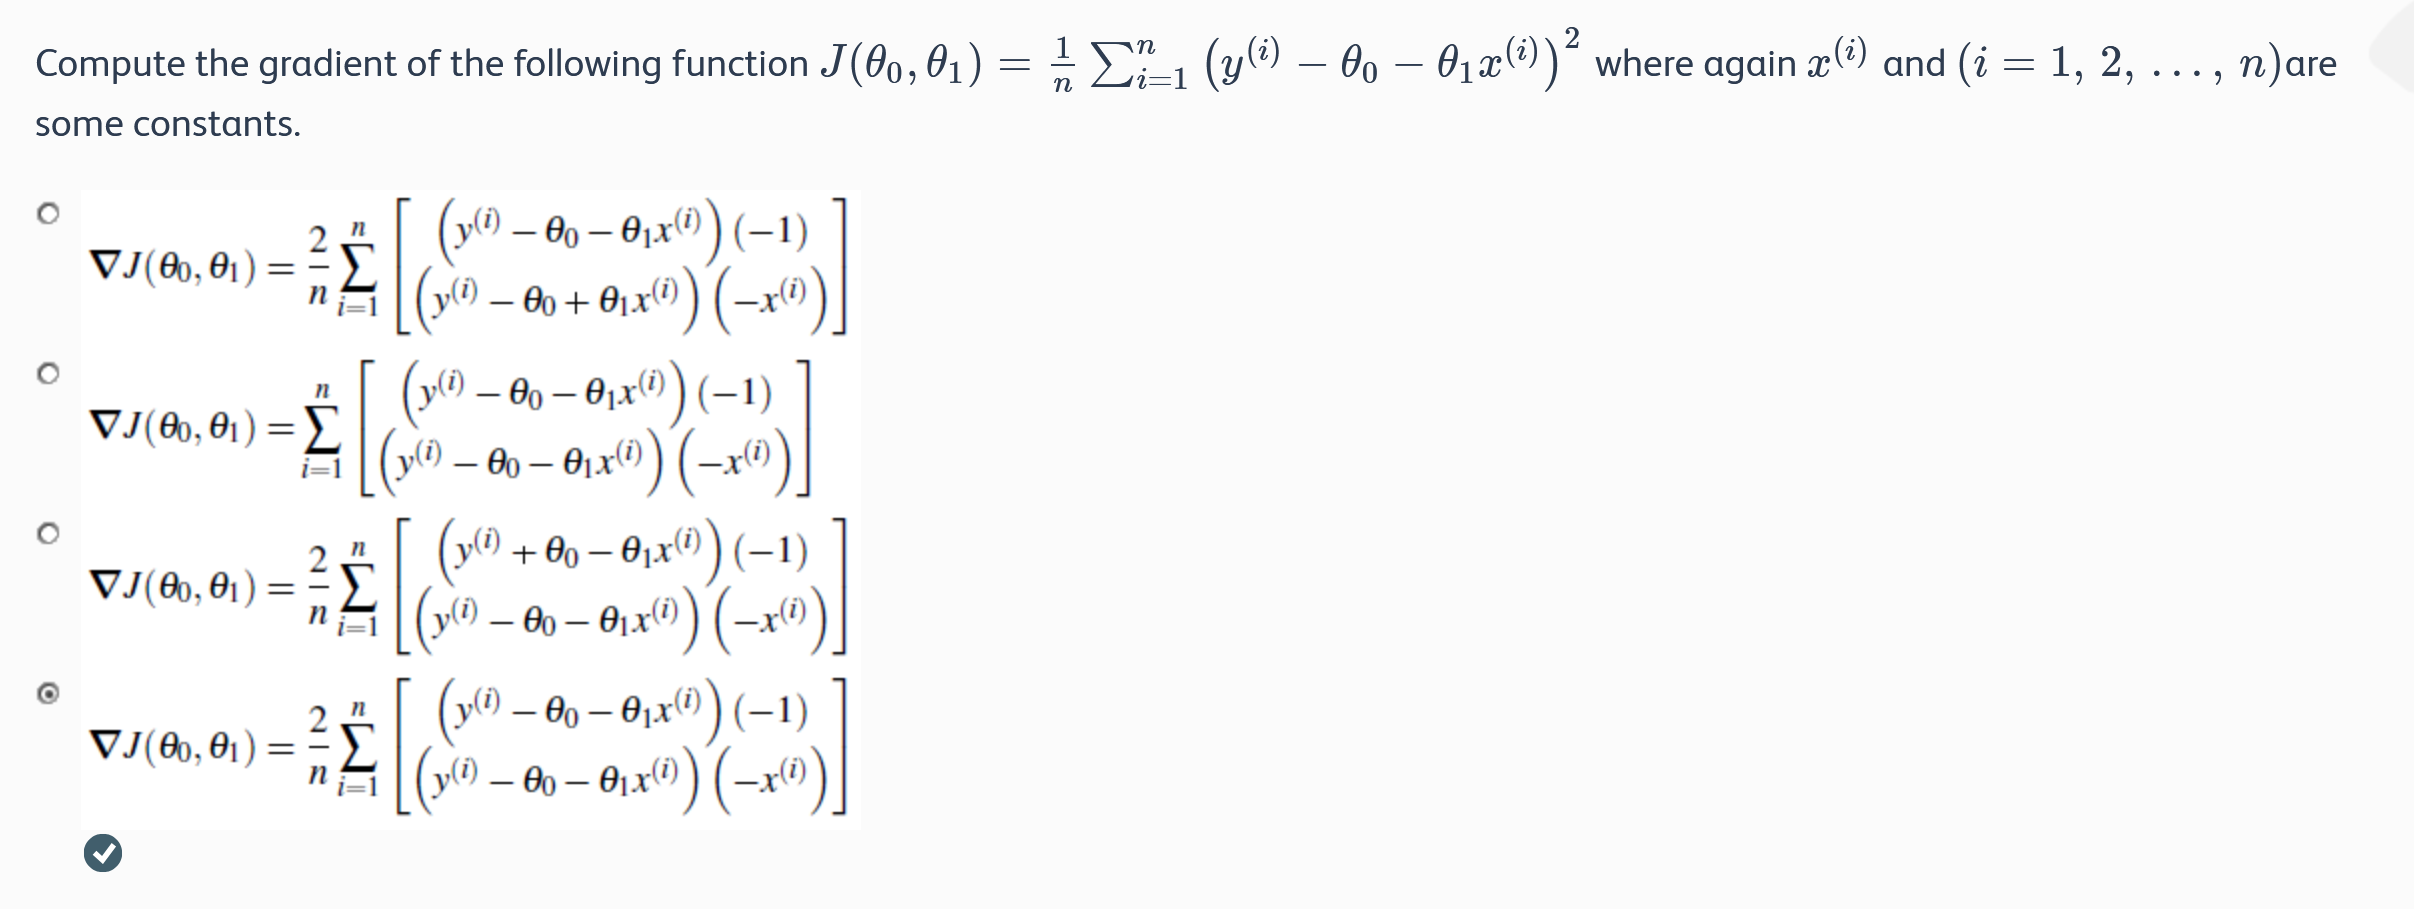

## Frage 5
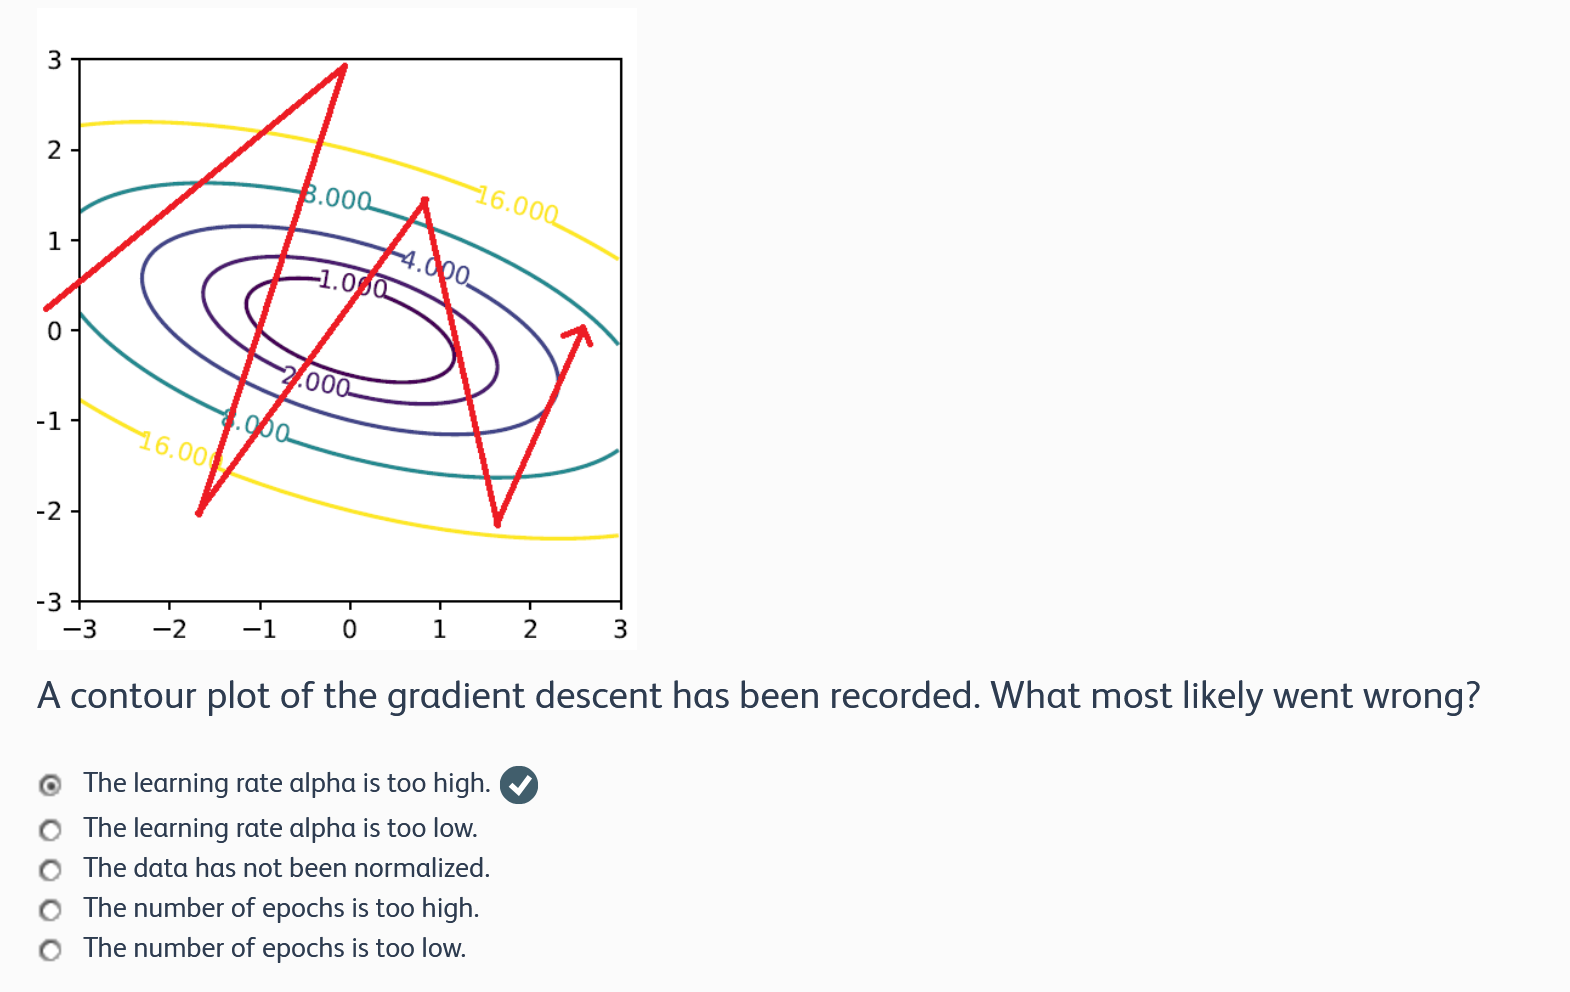

## Frage 6
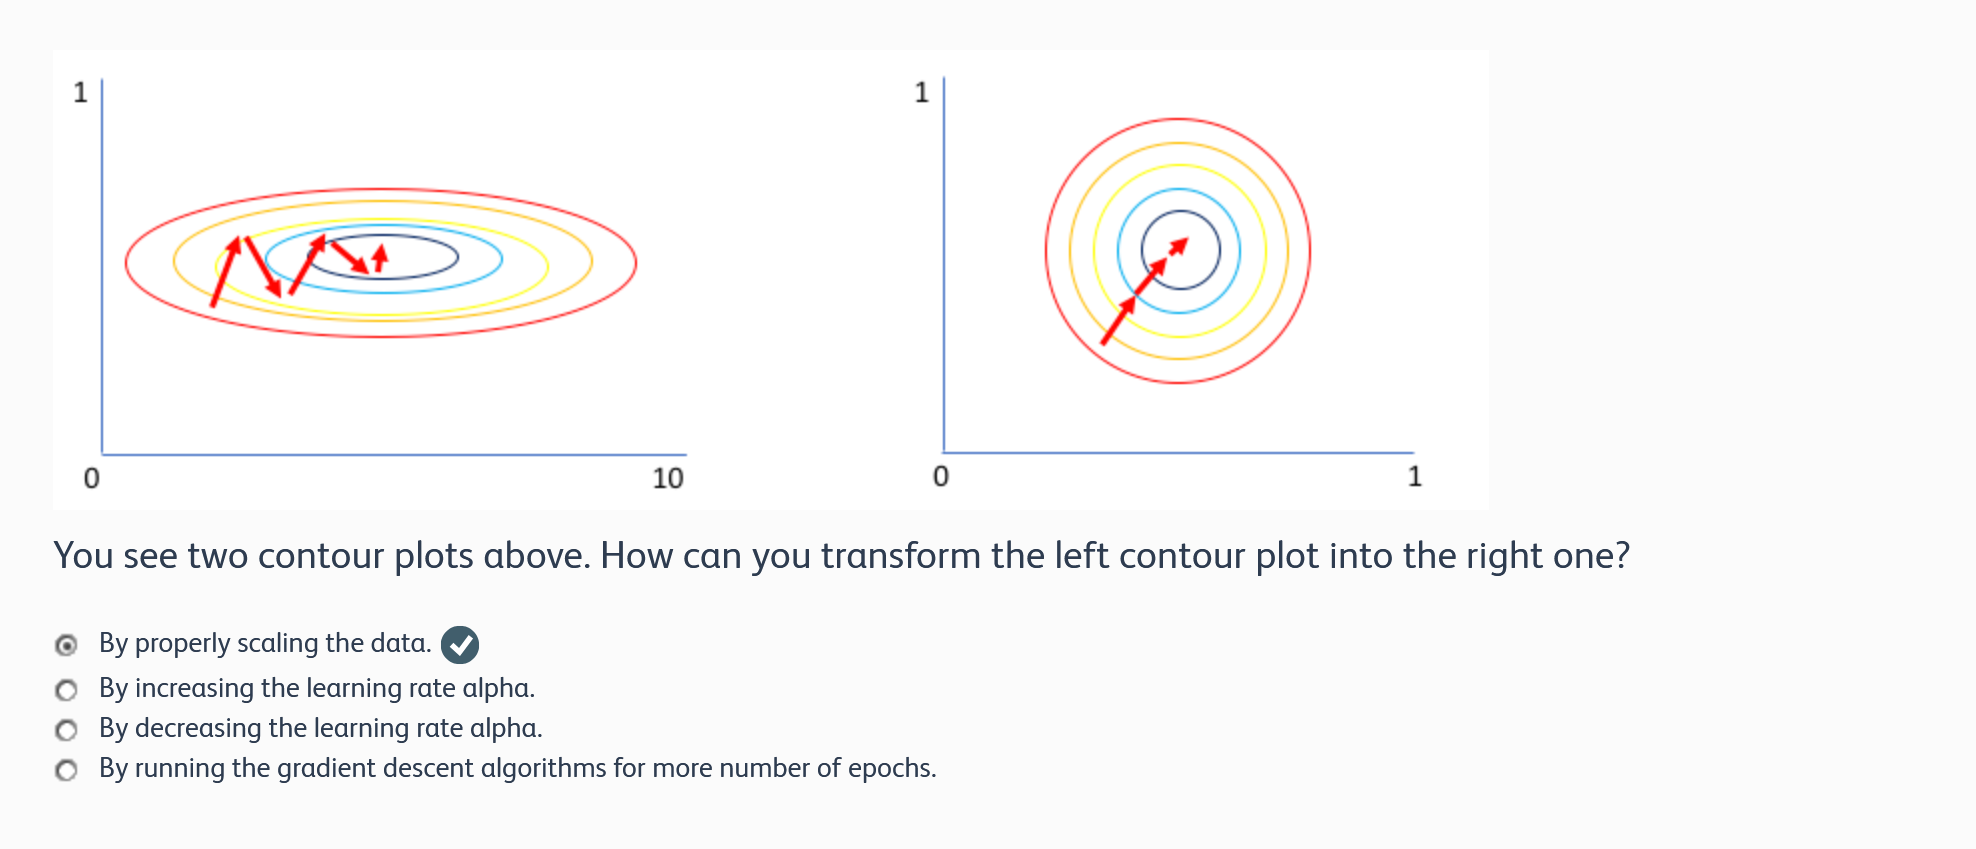